In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import matplotlib as mpl

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_set = x_train_set / 255.0
x_test = x_test / 255.0

In [4]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

3


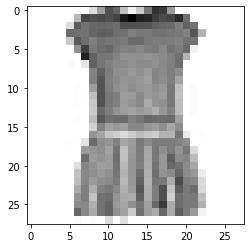

In [5]:
i=3
print(y_train_set[i])
plt.imshow(x_train_set[i],cmap='binary')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, random_state=1)

In [7]:
tf.random.set_seed(1)
np.random.seed(1)

In [8]:
re_encoder = keras.models.Sequential([
    keras.layers.LSTM(100,return_sequences=True, input_shape=[28,28]),
    keras.layers.LSTM(30)
])
re_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid'))
])
re_ae = keras.models.Sequential([re_encoder, re_decoder])

In [11]:
re_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 100)           51600     
                                                                 
 lstm_1 (LSTM)               (None, 30)                15720     
                                                                 
Total params: 67,320
Trainable params: 67,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
re_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_vector (RepeatVector  (None, 28, 30)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 28, 100)           52400     
                                                                 
 time_distributed (TimeDistr  (None, 28, 28)           2828      
 ibuted)                                                         
                                                                 
Total params: 55,228
Trainable params: 55,228
Non-trainable params: 0
_________________________________________________________________


In [12]:
re_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                67320     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            55228     
                                                                 
Total params: 122,548
Trainable params: 122,548
Non-trainable params: 0
_________________________________________________________________


In [13]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true),tf.round(y_pred))

In [14]:
re_ae.compile(loss='binary_crossentropy',
      optimizer=keras.optimizers.SGD(learning_rate=0.15),
      metrics=[rounded_accuracy])

In [15]:
train = re_ae.fit(x_train, x_train, epochs=20,
          validation_data=(x_valid, x_valid))

Epoch 1/20
1407/1407 [==============================] - 122s 82ms/step - loss: 0.5015 - rounded_accuracy: 0.7559 - val_loss: 0.4247 - val_rounded_accuracy: 0.8222
Epoch 2/20
1407/1407 [==============================] - 129s 92ms/step - loss: 0.3918 - rounded_accuracy: 0.8480 - val_loss: 0.3702 - val_rounded_accuracy: 0.8632
Epoch 3/20
1407/1407 [==============================] - 111s 79ms/step - loss: 0.3624 - rounded_accuracy: 0.8720 - val_loss: 0.3591 - val_rounded_accuracy: 0.8739
Epoch 4/20
1407/1407 [==============================] - 92s 66ms/step - loss: 0.3481 - rounded_accuracy: 0.8824 - val_loss: 0.3532 - val_rounded_accuracy: 0.8773
Epoch 5/20
1407/1407 [==============================] - 92s 65ms/step - loss: 0.3383 - rounded_accuracy: 0.8893 - val_loss: 0.3313 - val_rounded_accuracy: 0.8905
Epoch 6/20
1407/1407 [==============================] - 92s 65ms/step - loss: 0.3315 - rounded_accuracy: 0.8939 - val_loss: 0.3282 - val_rounded_accuracy: 0.8944
Epoch 7/20
1407/1407 [===

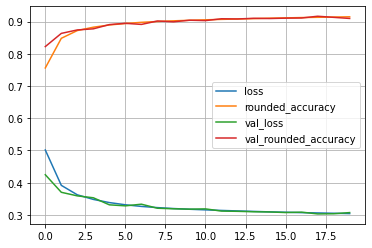

In [16]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [17]:
re_ae.evaluate(x_test,x_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3103 - rounded_accuracy: 0.9081


[0.31025391817092896, 0.9081081748008728]

In [18]:
x_test_decoded = re_ae.predict(x_test)

313/313 [==============================] - 8s 20ms/step


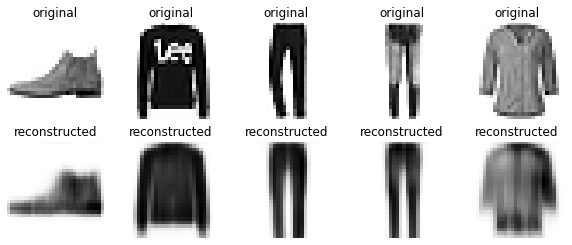

In [19]:
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(2,5,1+i)
  plt.imshow(x_test[i], cmap='binary')
  plt.title('original')
  plt.axis('off')

  plt.subplot(2,5,1+5+i)
  plt.imshow(x_test_decoded[i], cmap='binary')
  plt.title('reconstructed')
  plt.axis('off')
plt.show()

In [20]:
x_test_codings = re_encoder.predict(x_test)
x_test_codings.shape

313/313 [==============================] - 5s 12ms/step


(10000, 30)

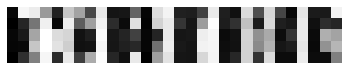

In [21]:
i=range(5)

plt.imshow(x_test_codings[i], cmap='binary')
plt.axis('off')
plt.show()